In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


In [ ]:
state_wheather = ("sunny", "cloudy", "rainy")
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

**Задание 1.** Выберите произвольное начальное состояние ("sunny", "cloudy" или "rainy") и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную `states`.

In [ ]:
#вероятности переходов в зависимости от последнего стостояния
def prob(laststate):
  if laststate == 'sunny': return transition_matrix[0]
  if laststate == 'cloudy': return transition_matrix[1]
  if laststate == 'rainy': return transition_matrix[2]

states = []
states.append(np.random.choice(state_wheather, size=1)[0])

for i in range(1,20001):
  s = np.random.choice(state_wheather, size=1, p=prob(states[i-1]))
  states.append(s[0])

print(states)


['sunny', 'rainy', 'sunny', 'sunny', 'cloudy', 'rainy', 'sunny', 'cloudy', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'sunny', 'cloudy', 'sunny', 'sunny', 'cloudy', 'sunny', 'rainy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'sunny', 'sunny', 'cloudy', '

**Задание 2.** На основе массива `states` рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве `states[:n]` для `n`, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте `n`, по у - частоту для каждого из трех типов погоды. Должна получиться примерно следующая картинка:

<ipython-input-74-9ec7d3623bd2>:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(20001), scount/np.arange(20001), label = 'sunny')
<ipython-input-74-9ec7d3623bd2>:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(20001), ccount/np.arange(20001), label = 'cloudy')
<ipython-input-74-9ec7d3623bd2>:12: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(20001), rcount/np.arange(20001), label = 'rainy')


<function matplotlib.pyplot.show(close=None, block=None)>

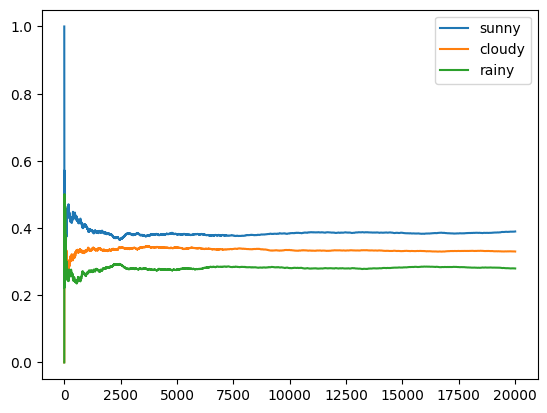

In [ ]:
scount = np.zeros(20001)
rcount = np.zeros(20001)
ccount = np.zeros(20001)

for n in range(0,20001):
  scount[n] = states[:n].count('sunny')
  rcount[n] = states[:n].count('rainy')
  ccount[n] = states[:n].count('cloudy')

plt.plot(np.arange(20001), scount/np.arange(20001), label = 'sunny')
plt.plot(np.arange(20001), ccount/np.arange(20001), label = 'cloudy')
plt.plot(np.arange(20001), rcount/np.arange(20001), label = 'rainy')
plt.legend()
plt.show

**Задание 3.** Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей, а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

$$ \pi = \pi P \Rightarrow \pi (E-P) = 0 \Rightarrow (E-P)^T\pi^T = 0$$

!!Но просто такая система получится вырожденой, поэтому изменим последнюю строку так, чтобы она давала информацию о том, что $x+y+z = 1$

In [ ]:
E = np.diag([1,1,1])
T = (E - transition_matrix).transpose()
b = np.zeros(3).reshape(-1,1)
b[2][0] = 1
T[2] = [1,1,1]


pi = np.linalg.solve(T, b).reshape(1,-1)
print(pi)
emper = [scount[20000]/20001, ccount[20000]/20001, rcount[20000]/20001]
print(emper)

a = np.linalg.matrix_power(transition_matrix, 100)
print(a)

#все результаты очень даже похожи

[[0.38888889 0.33333333 0.27777778]]
[0.38988050597470125, 0.3302834858257087, 0.279786010699465]
[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


$$\Large{Metropolis — Hastings \quad method}$$

In [ ]:
def metropolis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
            #print(current)
        post.append([current[0], current[1]])
    return post[nburn:]

In [ ]:
#value for MH
def value(point, mn, sigma):
  var = multivariate_normal(mean=mn, cov=sigma)
  return var.pdf(point)

In [ ]:
#proposal for MH
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    L = np.linalg.cholesky(sigma)
    return current + L @ np.random.randn(*current.shape)

In [ ]:
#size of sample
niter = 10000

In [ ]:
#start point
start = [0,0]

**Задание 5**. Методом Метрополиса — Гастингса постройте выборку из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей B = [[40, -26], [-26, 25]]. Сравните плоность по выборке (двумерную гистограмму) и теоретическую плотность.

[[15.69327147  5.6583293  13.71848704 ... 15.32628508  7.95393403
  -1.59777542]
 [-1.17745876  0.29876947  6.00268417 ... -0.47731696 -1.49799134
   5.47494799]]


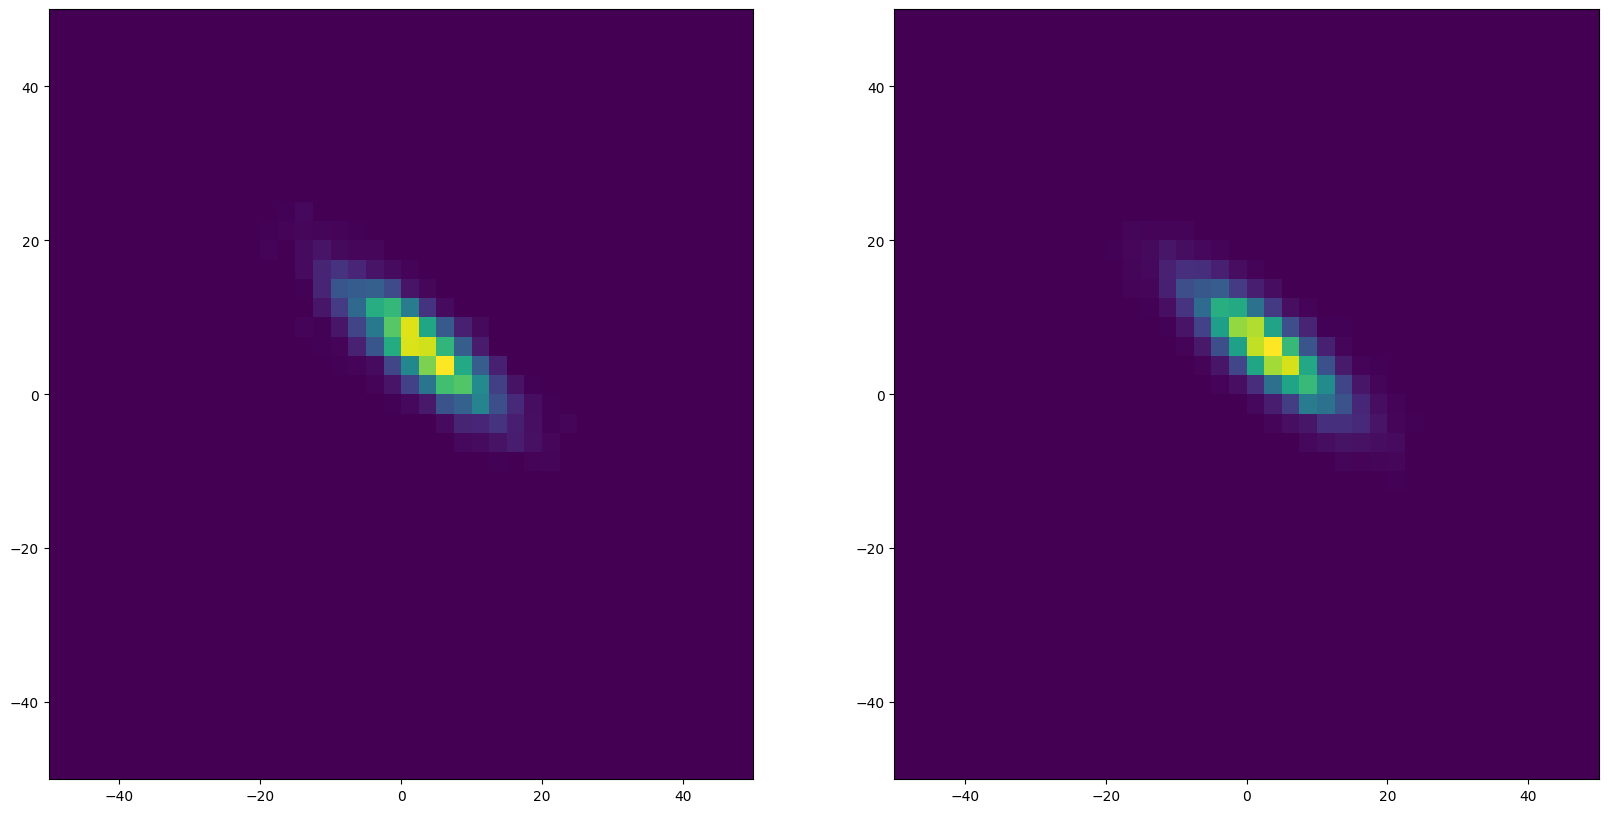

In [ ]:
samp = metropolis(start, value, proposal, niter, nburn=0, sigma = B, mn = m)
asamp = np.array(samp)

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.hist2d(asamp[:, 0], asamp[:, 1], bins=40, range = [[-50, 50], [-50, 50]])



m = np.array([3,6])
mr = m.reshape(-1,1)
B = np.array([[40, -26], [-26, 25]])
L = np.linalg.cholesky(B)

samples = L @ np.random.randn(2, niter) + mr
print(samples)
plt.subplot(1,2,2)
plt.hist2d(*samples, bins=40, range = [[-50, 50], [-50, 50]])


plt.show()

**Задание 6.** Решите задачу 5 методом cэмплирования по Гиббсу.

Используя формулы:

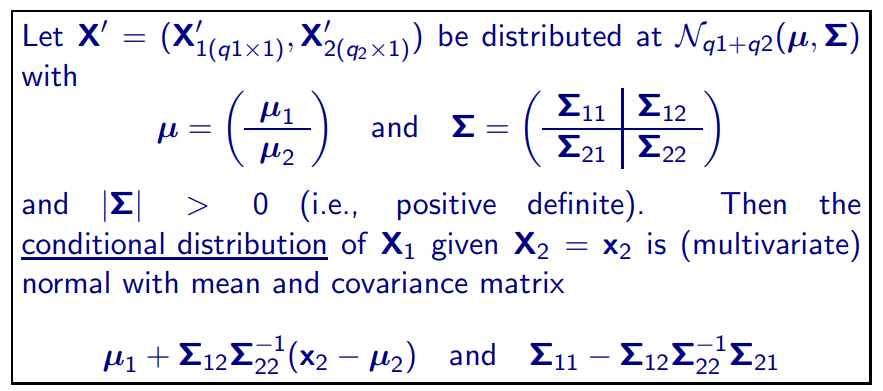

In [ ]:
def dens_x_cond_y0(x, y0):
  var = multivariate_normal(mean = 3 - (26/25)*(y0-6), cov = 40 - 26**2/25)
  return var.pdf(point)
def dens_y_cond_x0(y, x0):
  var = multivariate_normal(mean = 6 - (26/40)*(x0-3), cov = 25 - 26**2/40)
  return var.pdf(point)

[[ 0.          0.        ]
 [10.50974573  4.71146425]
 [13.41420892 -0.73158718]
 ...
 [ 6.71228794  1.6071263 ]
 [ 9.21662154  4.1466598 ]
 [10.75348934  2.78223155]]
3.00195159871873 5.997916184267655
[[ 39.9848852  -25.99149348]
 [-25.99149348  24.99879578]]


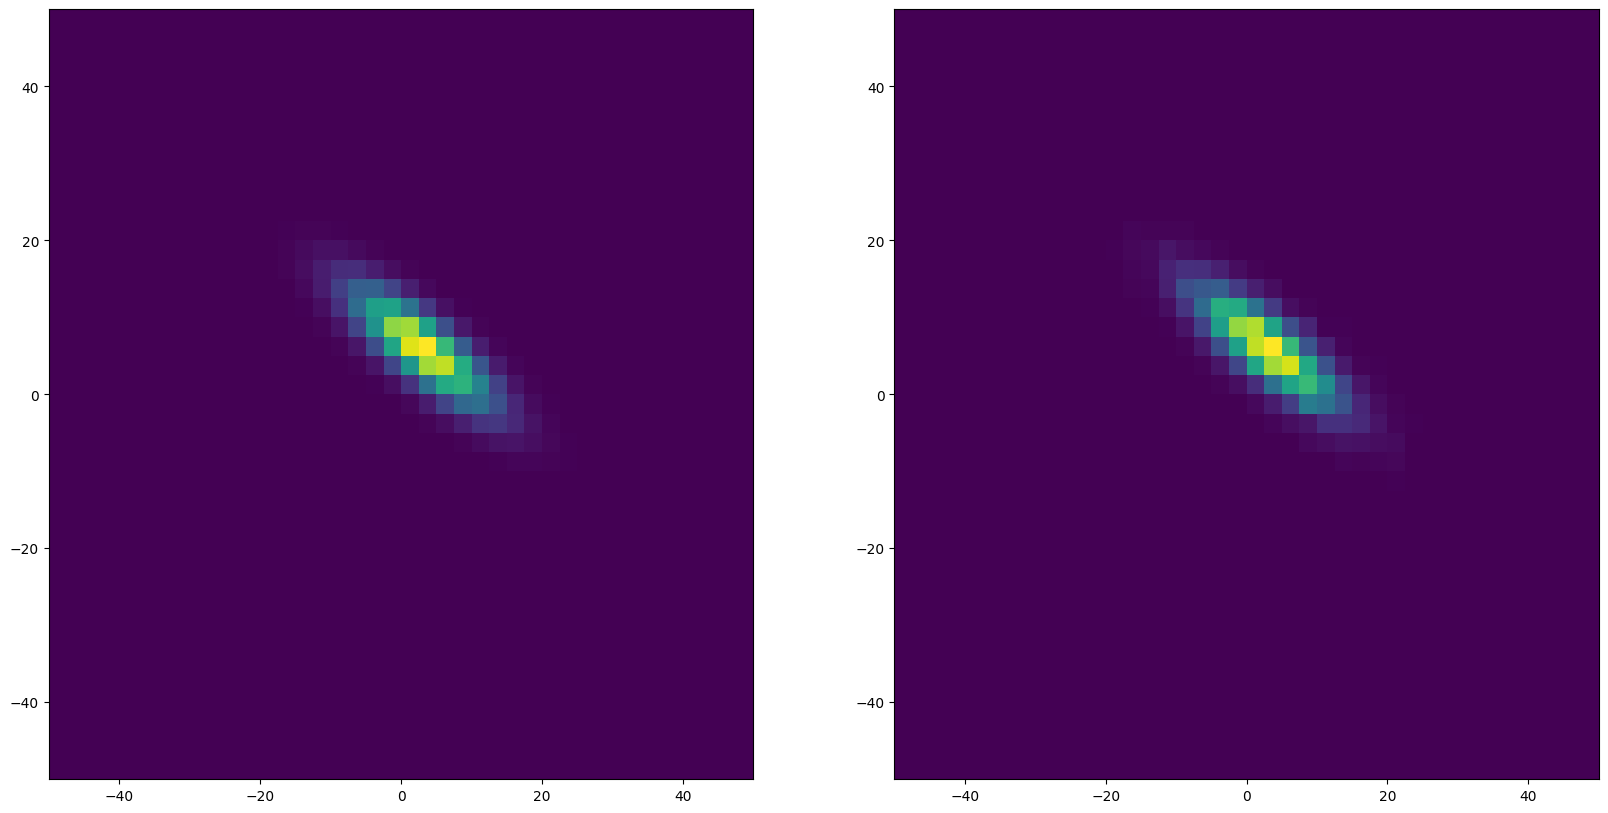

In [151]:
def gs(n, start):
  sample = []
  sample.append(start)

  for i in range (1,n):
    sy = np.random.normal(6 - (26/40)*(sample[i-1][0]-3), np.sqrt(25 - 26**2/40))
    sx = np.random.normal(3 - (26/25)*(sy-6), np.sqrt(40 - 26**2/25))

    s = [sx, sy]
    sample.append(s)

  return sample


s = gs(10000000, [0,0])
#print(s)
sam = np.array(s)
print(sam)

xm, ym = np.mean(sam[:, 0]), np.mean(sam[:, 1])
print(xm, ym)

covar = np.cov(sam[:, 0],sam[:, 1])
print(covar)


plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.hist2d(sam[:, 0], sam[:, 1], bins=40, range = [[-50, 50], [-50, 50]])

plt.subplot(1,2,2)
plt.hist2d(*samples, bins=40, range = [[-50, 50], [-50, 50]])

plt.show()

